In [4]:
import torch
import cv2
from model import SASNet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
args = {
    "model_path" : "./models/SHHA.pth",
    "block_size" : 32,
    "log_para" : 1000,
    "batch_size" : 4
}

In [22]:
import torchvision.transforms as standard_transforms
transform = standard_transforms.Compose([

    standard_transforms.ToTensor(),
    standard_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

    ])

In [23]:
model = SASNet(args=args)
# load the trained model
model.load_state_dict(torch.load(args["model_path"], map_location='cpu'))
print('successfully load model from', args["model_path"])

successfully load model from ./models/SHHA.pth


In [23]:
with torch.no_grad():
    model.eval()

    img = cv2.imread("drone.jpg")
    img = cv2.resize(img, (1024, 768))
    img = transform(img).unsqueeze(0)
    pred_map = model(img)

    pred_map = pred_map.data.cpu().numpy()

In [4]:
img.shape

In [26]:
np.uint8(np.array(pred_map.squeeze()) * 31)

CPU times: user 27.4 s, sys: 4.72 s, total: 32.1 s
Wall time: 8.3 s


In [5]:
import numpy as np

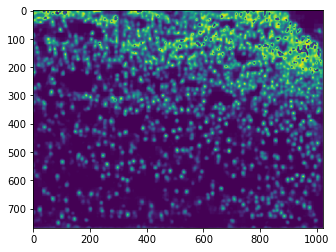

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
plt.imshow(np.uint8(np.array(pred_map.squeeze()) * 31))

1202.692

In [29]:
pred_map.shape

In [27]:
np.sum(pred_map)/1000

In [31]:
(pred_map).astype(int).max()

In [32]:
32*8

CPU times: user 31.2 s, sys: 1.05 s, total: 32.2 s
Wall time: 8.81 s
